In [1]:
import pandas as pd

df = pd.read_csv('health_data_gender.csv')
print(df)


    Name  Gender  Age   BP  Cholesterol
0    Ali    Male   45  130          220
1   Sara  Female   52  145          200
2   Omar    Male   35  125          180
3   Hany    Male   40  135          210
4   Nour  Female   29  118          170
5  Dalia  Female   55  150          230


In [2]:
grouped = df.groupby('Gender').agg({'BP': 'mean', 'Cholesterol': 'mean'})
print(grouped)


                BP  Cholesterol
Gender                         
Female  137.666667   200.000000
Male    130.000000   203.333333


In [3]:
pivot = df.pivot_table(values=['BP', 'Cholesterol'], index='Gender', aggfunc='mean')
print(pivot)


                BP  Cholesterol
Gender                         
Female  137.666667   200.000000
Male    130.000000   203.333333


In [4]:
import pandas as pd

# Load
patients = pd.read_csv('patients.csv')
tests = pd.read_csv('tests.csv')
meds = pd.read_csv('medications.csv')

print(patients.head())
print(tests.head())
print(meds.head())


   ID  Name  Gender  Age Smoker
0   1   Ali    Male   45      Y
1   2  Sara  Female   52      N
2   3  Omar    Male   35      Y
3   4  Hany    Male   40      N
4   5  Nour  Female   29      N
   ID   VisitDate   BP  Cholesterol
0   1  2024-07-01  130          220
1   2  2024-07-01  145          200
2   3  2024-07-02  125          180
3   4  2024-07-02  135          210
4   5  2024-07-03  118          170
   ID   VisitDate  DrugName  Dose
0   1  2024-07-01  Atenolol  50mg
1   2  2024-07-01    Statin  20mg
2   3  2024-07-02      None   0mg
3   4  2024-07-02  Atenolol  25mg
4   5  2024-07-03      None   0mg


In [6]:
merged = pd.merge(tests, meds, on=['ID', 'VisitDate'])
final = pd.merge(merged, patients, on='ID')

print(final)


   ID   VisitDate   BP  Cholesterol  DrugName  Dose   Name  Gender  Age Smoker
0   1  2024-07-01  130          220  Atenolol  50mg    Ali    Male   45      Y
1   2  2024-07-01  145          200    Statin  20mg   Sara  Female   52      N
2   3  2024-07-02  125          180      None   0mg   Omar    Male   35      Y
3   4  2024-07-02  135          210  Atenolol  25mg   Hany    Male   40      N
4   5  2024-07-03  118          170      None   0mg   Nour  Female   29      N
5   6  2024-07-03  150          230    Statin  40mg  Dalia  Female   55      Y


In [7]:
# Avg BP by Gender + Smoker
grouped = final.groupby(['Gender', 'Smoker']).agg({'BP':'mean', 'Cholesterol':'mean'})
print(grouped)


                  BP  Cholesterol
Gender Smoker                    
Female N       131.5        185.0
       Y       150.0        230.0
Male   N       135.0        210.0
       Y       127.5        200.0


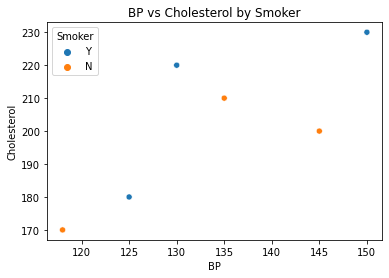

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=final, x='BP', y='Cholesterol', hue='Smoker')
plt.title('BP vs Cholesterol by Smoker')
plt.savefig('Day10_BPvsCholesterol.png')
plt.show()
